In [127]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


Создаем базу данных

In [2]:
con = sqlite3.connect('db')


Ссылка на датасет - https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

Считываем файл, с которым будем работать

In [3]:
df = pd.read_csv('SQL/Data/supermarket_sales.csv')


In [4]:
df


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


Заменим пробелы в названиях колонок на символ подчеркивания ('_'). Также названия колонок сделаем с маленькой буквы.

In [5]:
df.columns = df.columns.str.replace(' ', '_').str.lower()


In [6]:
df


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


По умолчанию csv читается как текст, поэтому нужно преобразовать колонку date в формат даты

In [7]:
df['date'] = pd.to_datetime(df['date'])


Теперь добавляем таблицу в базу данных

In [8]:
df.to_sql('supermarket_sales',con,index=False, if_exists='replace')


1000

Напишем функцию для удобства обращения к базе данных

In [9]:
def select(sql):
    return pd.read_sql(sql,con)


In [256]:
sql = '''select *
from supermarket_sales
limit 5'''


In [257]:
select(sql)


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 00:00:00,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08 00:00:00,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 00:00:00,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 00:00:00,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 00:00:00,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Датасет содержит:

• Invoice ID : Идентификатор чека

• Branch : Филиал магазина

• City (строка): Город расположения филиала

• Customer type : Тип клиента (член клуба или обычный)

• Gender : Пол покупателя

• Product line : Категория продукта

• Unit price : Цена за единицу товара

• Quantity : Количество купленного товара

• Tax 5% : Налог 5% на покупку

• Total : Общая стоимость покупки (с налогом)

• Date : Дата покупки 

• Time : Время покупки

• Payment : Способ оплаты (наличные, кредитная карта, электронный кошелек)

• cogs : Стоимость товара без налога

• gross margin percentage : Процент валовой прибыли

• gross income : Валовой доход

• Rating : Рейтинг покупки клиентом

__________

• Какой филиал имеет самый высокий доход?

In [273]:
sql = '''select
branch,
round(sum(total)) as total_revenue
from supermarket_sales
group by branch
order by total_revenue DESC'''


In [274]:
select(sql)


,branch,total_revenue
0,C,110569.0
1,A,106200.0
2,B,106198.0


Филиал "С" имеет наибольший доход

• Какое распределение покупок между членами клуба и обычными покупателями по городам?

In [271]:
sql = '''
with t AS (select
city,
customer_type,
sum(total) as revenue
from supermarket_sales
group by city, customer_type),

t2 as (select
city,
sum(total) as total_revenue_by_city
from supermarket_sales
group by city)

select
t.city,
t.customer_type,
t.revenue,
round(t.revenue / t2.total_revenue_by_city * 100)  as share_of_the_city_revenue
from t
left join t2 on t.city = t2.city
'''


In [272]:
select(sql)


,city,customer_type,revenue,share_of_the_city_revenue
0,Mandalay,Member,53704.6860,51.0
1,Mandalay,Normal,52492.9860,49.0
2,Naypyitaw,Member,56881.2825,51.0
3,Naypyitaw,Normal,53687.4240,49.0
4,Yangon,Member,53637.4755,51.0
5,Yangon,Normal,52562.8950,49.0


Покупки между членами клуба и обычными покупателями во всех городах распределены примерно пополам

• Есть ли различия в предпочтениях между клиентами разного пола (Gender)?

In [269]:
sql = '''
select
gender,
product_line,
round(sum(total)) as revenue
from supermarket_sales
where gender = 'Female'
group by gender, product_line
order by revenue DESC
limit 3
'''


In [270]:
select(sql)


,gender,product_line,revenue
0,Female,Food and beverages,33171.0
1,Female,Fashion accessories,30437.0
2,Female,Home and lifestyle,30037.0


In [275]:
sql = '''
select
gender,
product_line,
round(sum(total)) as revenue
from supermarket_sales
where gender = 'Male'
group by gender, product_line
order by revenue DESC
limit 3
'''


In [276]:
select(sql)


,gender,product_line,revenue
0,Male,Health and beauty,30633.0
1,Male,Electronic accessories,27236.0
2,Male,Sports and travel,26548.0


Различия в предпочтениях между женщинами и мужчинами определено есть:

Топ 3 категории товаров для женщин : Food and beverages, Fashion accessories, Home and lifestyle

Топ 3 категории покупок для мужчин : Health and beauty, Electronic accessories	, Sports and travel	

• Существует ли корреляция между оценкой обслуживания и общим объемом продаж? 

In [277]:
sql = '''
select
product_line,
round(avg(rating),1) as average_rating,
round(sum(total)) as revenue
from supermarket_sales
group by product_line
order by average_rating DESC
'''


In [278]:
select(sql)


,product_line,average_rating,revenue
0,Food and beverages,7.1,56145.0
1,Health and beauty,7.0,49194.0
2,Fashion accessories,7.0,54306.0
3,Sports and travel,6.9,55123.0
4,Electronic accessories,6.9,54338.0
5,Home and lifestyle,6.8,53862.0


<Axes: xlabel='average_rating'>

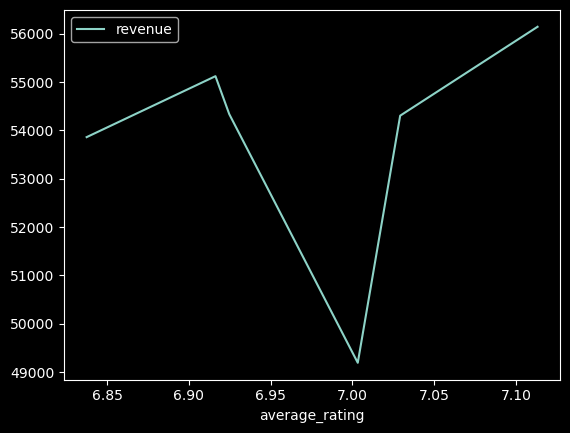

In [139]:
select(sql).plot(x = 'average_rating', y = 'revenue')


Как видно из графика оценка обслуживания не всегда коррелирует с объемом продаж

• Какое распределение выручки по дням недели?

In [279]:
sql = '''
select
case
    strftime('%w', date)
    WHEN '0' THEN 'Sunday'
    WHEN '1' THEN 'Monday'
    WHEN '2' THEN 'Tuesday'
    WHEN '3' THEN 'Wednesday'
    WHEN '4' THEN 'Thursday'
    WHEN '5' THEN 'Friday'
    WHEN '6' THEN 'Saturday'
    END AS day_of_week,
    round(sum(total),0) as revenue
from supermarket_sales
group by day_of_week
order by revenue DESC
'''


In [280]:
select(sql)


,day_of_week,revenue
0,Saturday,56121.0
1,Tuesday,51482.0
2,Thursday,45349.0
3,Sunday,44458.0
4,Friday,43926.0
5,Wednesday,43731.0
6,Monday,37899.0


In [118]:
t = select(sql)


<Axes: xlabel='day_of_week', ylabel='revenue'>

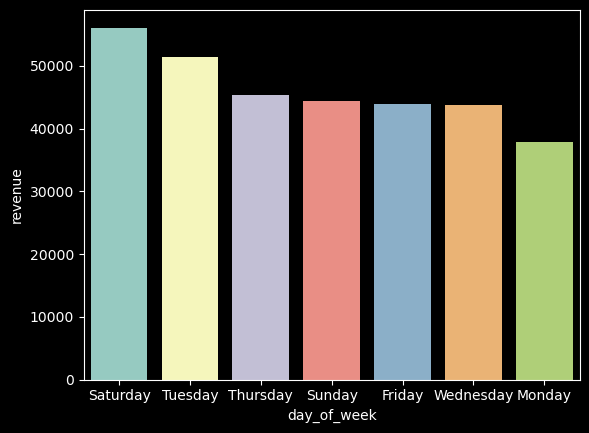

In [130]:
sns.barplot(data = t, x = 'day_of_week', y = 'revenue')


Самая высокая выручка по субботам, а самая низкая в понедельник. В целом выручка по дням недели распределена равномерно

• Как меняется объем продаж в каждой категории из месяца в месяц?

In [283]:
sql = '''
with revenue as(
SELECT
strftime('%m', date) as month,
product_line,
sum(total) as revenue
FROM supermarket_sales
group by month, product_line),

total_revenue AS (
select
month,
product_line,
revenue,
sum(revenue) OVER (partition by product_line order by month) as total_revenue
from revenue)

select
case
when month = '01' then 'January'
when month = '02' then 'February'
when month = '03' then 'March'
end as month_name,
product_line as product_category,
revenue as monthly_revenue,
total_revenue as total_revenue,
coalesce(round((revenue - lag(revenue) OVER ( partition by product_line order by month))/ lag(revenue) OVER ( partition by product_line order by month) * 100,0),0) as monthly_growth_rate
from total_revenue
order by product_line
'''


In [284]:
select(sql)


,month_name,product_category,monthly_revenue,total_revenue,monthly_growth_rate
0,January,Electronic accessories,18831.2880,18831.2880,0.0
1,February,Electronic accessories,17362.9050,36194.1930,-8.0
2,March,Electronic accessories,18143.3385,54337.5315,4.0
3,January,Fashion accessories,19345.1160,19345.1160,0.0
4,February,Fashion accessories,19009.8615,38354.9775,-2.0
5,March,Fashion accessories,15950.9175,54305.8950,-16.0
6,January,Food and beverages,19570.5300,19570.5300,0.0
7,February,Food and beverages,20000.3580,39570.8880,2.0
8,March,Food and beverages,16573.9560,56144.8440,-17.0
9,January,Health and beauty,16383.1710,16383.1710,0.0


Практически во всех категориях в феврале наблюдается снижение выручки по сравнению с январем, за исключением категории "Food and Beverages".

В марте по сравнению с февралем наблюдается значительный прирост выручки в категориях: Health and Beauty, Home and Lifestyle, Sports and Travel. Однако в то же время в категориях Fashion Accessories и Food and Beverages зафиксировано падение выручки.

Категория "Food and beverages" оказалась более устойчивой в феврале, что может свидетельствовать о более стабильном или регулярном потреблении данных товаров. В то время как другие категории, такие как "Health and beauty", "Home and lifestyle", "Sports and travel" показывают восстановление в марте после падения в феврале. Это может быть связано с весенним возобновлением активности потребителей и изменениями в потребительских предпочтениях.

Снижение выручки в категориях "Fashion accessories" и "Food and beverages" в марте может указывать на изменение трендов или насыщение рынка, что требует дополнительного анализа для понимания причин этих тенденций.
